# CA683 Data Analytics and Data Mining Assignment

## Data Loading

In [1]:
#DataLoading
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
result=pd.read_csv("C:\\Users\\romil\\Downloads\\yellow_tripdata_2021-07.csv")

C:\Users\romil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
len(result)

2821515

In [3]:
result.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [4]:
#Eliminating columns that are not required
result=result[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance', 'payment_type', 'fare_amount', 'total_amount','tip_amount']]

## Data Processing

In [5]:
result.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,passenger_count,trip_distance,payment_type,fare_amount,total_amount,tip_amount
count,2690859.00000,2821515.00000,2690859.00000,2821515.00000,2821515.00000,2821515.00000
mean,1.46099,7.78665,1.26011,13.64102,19.87764,2.35525
std,1.07020,760.81913,0.47845,12.88066,15.67248,2.88678
min,0.00000,0.00000,1.00000,-550.00000,-554.05000,-91.66000
25%,1.00000,1.10000,1.00000,6.50000,11.76000,0.00000
50%,1.00000,1.89000,1.00000,9.50000,15.30000,2.00000
75%,2.00000,3.45000,1.00000,15.00000,21.30000,3.05000
max,9.00000,305397.57000,5.00000,1320.00000,1320.80000,400.00000


We can clearly see there are some significant outliers and incorrect (negative) values

In [6]:
#Checking for duplicate values
result.duplicated().sum()

0

### Handling Null Values

In [7]:
result.isnull().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          130656
trip_distance                 0
payment_type             130656
fare_amount                   0
total_amount                  0
tip_amount                    0
dtype: int64

In [8]:
tempdf1=result[result['payment_type'].isnull()]
tempdf2=result[result['passenger_count'].isnull()]
len(tempdf2)-len(tempdf1) #same rows might have both both values as null

0

In [9]:
result=result[result['passenger_count'].notnull()]
result.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
payment_type             0
fare_amount              0
total_amount             0
tip_amount               0
dtype: int64

## Handling Outliers

In [10]:
#Since tips for payment type other than credit cards are not recorded,
#Eliminating all rows with 'payment_type' not equal to 1
result=result[result['payment_type']==1]

In [11]:
#'passenger_count' is a value that is entered manually by every driver for every trip.
#Since, it is manually added there is a high possibility that it may be incorrectly entered for some trips.
#The maximum number of passengers allowed to travel in a yellow taxi by law is 6.
#Therefore we eliminate all trips that has a higher passenger count than 6.
#Also eliminating rows where passenger_count=0
result=result[result['passenger_count']!=0]
result=result[result['passenger_count']<=6]

In [12]:
#Eliminating rows where fare_amount=0
result=result[result['fare_amount']!=0]
#Eliminating rows where total_amount=0
result=result[result['total_amount']!=0]
#Eliminating rows with trip_distance=0
result=result[result['trip_distance']!=0]

In [13]:
#Creating all combinations possible with the three columns that have negative values
tempdf1=result[(result.fare_amount<0) & (result.tip_amount<0) & (result.total_amount<0)]
tempdf2=result[(result.fare_amount<0) & (result.tip_amount<0) & (result.total_amount>0)]
tempdf3=result[(result.fare_amount<0) & (result.tip_amount>=0) & (result.total_amount<0)]
tempdf4=result[(result.fare_amount<0) & (result.tip_amount>=0) & (result.total_amount>0)]
tempdf5=result[(result.fare_amount>0) & (result.tip_amount<0) & (result.total_amount<0)]
tempdf6=result[(result.fare_amount>0) & (result.tip_amount<0) & (result.total_amount>0)]
tempdf7=result[(result.fare_amount>0) & (result.tip_amount>=0) & (result.total_amount<0)]
tempdf8=result[(result.fare_amount>0) & (result.tip_amount>=0) & (result.total_amount>=0)]
#Verifying if all cases are correctly covered
x=len(tempdf1)+len(tempdf2)+len(tempdf3)+len(tempdf4)+len(tempdf5)+len(tempdf6)+len(tempdf7)+len(tempdf8)-len(result)

y=len(tempdf1)+len(tempdf2)+len(tempdf3)+len(tempdf4)+len(tempdf5)+len(tempdf6)+len(tempdf7)
#tempdf1.head()
print(x)
print(y)

0
7


In [14]:
#Since the total number of rows with negative fare values are not statistically significant, we can eliminate them.
#Eliminating rows where fare_amount<0
result=result[result['fare_amount']>0]
#Eliminating rows where tip_amount<0
result=result[result['tip_amount']>0]
#Eliminating rows where total_amount<0
result=result[result['total_amount']>0]

# Feature Engineering

In [15]:
#Focusing on PICKUP data only

#Changing the data type of pickup and dropoff datetime attributes
result['tpep_pickup_datetime']=pd.to_datetime(result['tpep_pickup_datetime'])

#Adding month number columns
result['pickup_month_number']=result['tpep_pickup_datetime'].dt.month

#Filtering out any trips that may have intiated in any other months
result=result[result.pickup_month_number==7]

#Adding month name column
result['pickup_month']=result['tpep_pickup_datetime'].dt.month_name()

#Adding weekday number columns
result['pickup_day_number']=result['tpep_pickup_datetime'].dt.weekday

#Adding weekday number columns
result['pickup_day']=result['tpep_pickup_datetime'].dt.day_name()

#Adding hour column
result['pickup_hour']=result['tpep_pickup_datetime'].dt.hour

In [16]:
#Calculating tip percentage
def tipper(x,y):
  if (x==y):
    return 100
  else:
    z=(x/y)*100
    return z

temp_df2=result.apply(lambda row: tipper(row['tip_amount'],row['total_amount']), axis=1)
result=pd.concat([result, temp_df2], axis=1)
result=result.rename(columns={0:'tip_percentage'})

In [17]:
#Creating tip percent bins: Split at average of tip percentage into 2 halves denoted by 1 and 2 respectively
def tip_percent_bin(x):
    if (x <=16.66666):
        return 1
    else:
        return 2

temp_df=result.apply(lambda row: tip_percent_bin(row['tip_percentage']), axis=1)
result=pd.concat([result, temp_df], axis=1)
result=result.rename(columns={0:'tip_percentage_bin'})

In [18]:
#Calculating Speed
result['tpep_dropoff_datetime']= pd.to_datetime(result['tpep_dropoff_datetime'])
result['tpep_pickup_datetime']= pd.to_datetime(result['tpep_pickup_datetime'])

result['timediff']=result['tpep_dropoff_datetime']-result['tpep_pickup_datetime']

result['diff_in_seconds'] = pd.Series(pd.to_timedelta(result['timediff']))
result['diff_in_seconds']=result['diff_in_seconds'].dt.total_seconds()
result['trip_duration_mins']=result['diff_in_seconds']/60
result['trip_duration_hours']=result['diff_in_seconds']/3600

#Unit of speed is miles per hour
result['speed']=result['trip_distance']/result['trip_duration_hours']

In [19]:
#Only average speed between 1 and 50mph is considered
result=result[(result['speed']>=1) & (result['speed']<=50)]
#Trips lasting more than 1 min are only considered
result=result[result['trip_duration_mins']>=1]
#Trip distance between 1 and 850 miles is only considered
result=result[(result['trip_distance']>=1) & (result['trip_distance']<=850)]

In [20]:
def quater_of_day(x):
    if x in range(4,10):
        return 1
    elif x in range(10,16):
        return 2
    elif x in range(16,22):
        return 3
    elif x in range(22,24):
        return 4
    elif x in range(0,4):
        return 4

temp_df=result.apply(lambda row: quater_of_day(row['pickup_hour']), axis=1)
result=pd.concat([result, temp_df], axis=1)
result=result.rename(columns={0:'pickup_hour_quater'})

In [21]:
#Eliminating columns that are not required
result=result[['passenger_count','trip_distance', 'pickup_day_number','pickup_day', 'tip_percentage','tip_percentage_bin', 'speed','pickup_hour_quater','trip_duration_hours', 'trip_duration_mins']]

In [22]:
#Taking log of speed and trip distance
log_speed=np.log(result['speed'])
log_dist=np.log(result['trip_distance'])
log_trip_dur_hour=np.log(result['trip_duration_hours'])
log_trip_dur_min=np.log(result['trip_duration_mins'])
result=pd.concat([result,log_speed,log_dist,log_trip_dur_hour,log_trip_dur_min], axis=1)
headers=['passenger_count', 'trip_distance','pickup_day_number','pickup_day','tip_percentage','tip_percentage_bin','speed','pickup_hour_quater','trip_duration_hours','trip_duration_mins', 'log_speed',	'log_trip_distance','log_trip_duration_hours','log_trip_duration_mins']
result.columns=headers

In [23]:
#Adding unique ID column
result.insert(0, 'id', range(1, 1 + len(result)))

## Data Exploration

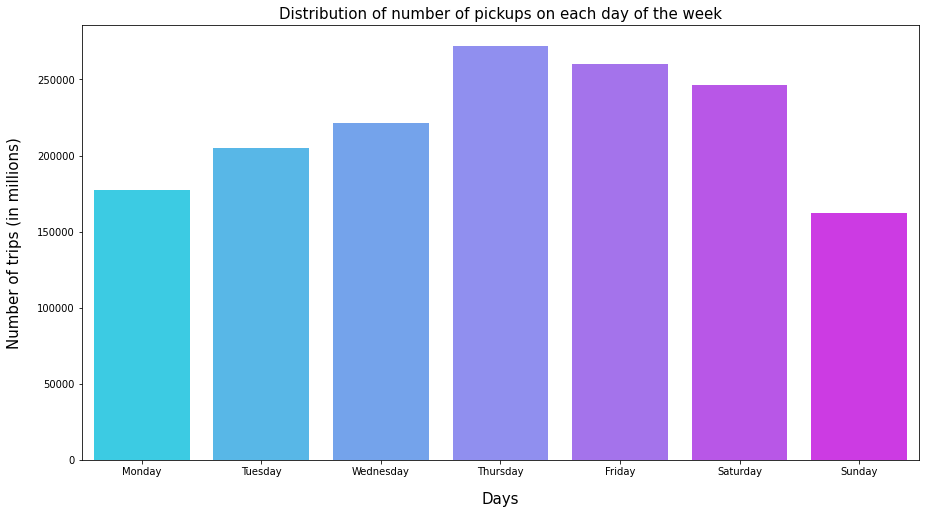

In [24]:
dec_weekday = result.groupby(['pickup_day'])['id'].count().reset_index(name='count')
f, ax=plt.subplots(figsize=(15,8))
order_week=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.title('Distribution of number of pickups on each day of the week', fontdict={'fontsize':15})
sns.barplot(x='pickup_day',y='count', data=dec_weekday, palette='cool', order=order_week)
ax.set_xlabel('Days', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Number of trips (in millions)', labelpad=15, fontdict={'fontsize':15})
plt.show()

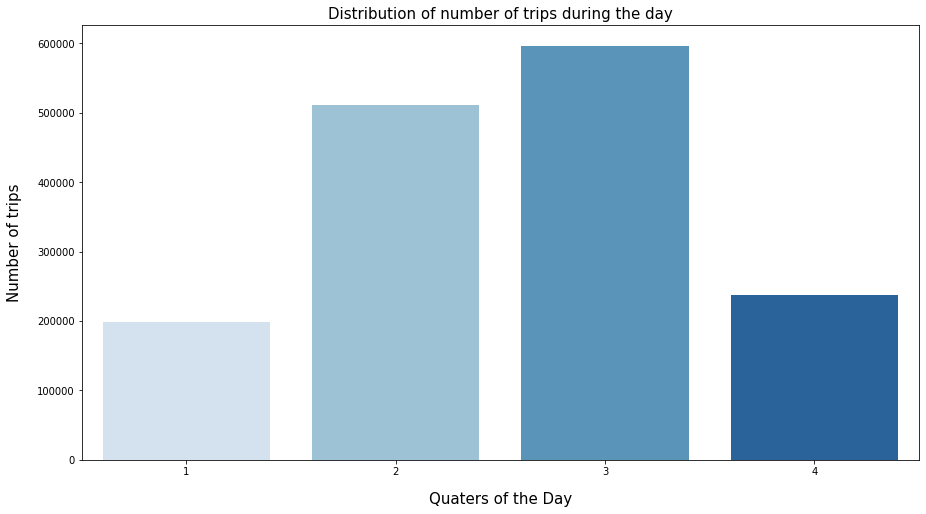

In [25]:
pickup_halfquater = result.groupby(['pickup_hour_quater'])['id'].count().reset_index(name='Count')
f, ax=plt.subplots(figsize=(15,8))
plt.title('Distribution of number of trips during the day', fontdict={'fontsize':15})
sns.barplot(x='pickup_hour_quater',y='Count', data=pickup_halfquater, palette='Blues')
ax.set_xlabel('Quaters of the Day', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Number of trips', labelpad=15, fontdict={'fontsize':15})
plt.show()

## Trip Duration

<AxesSubplot:xlabel='trip_duration_mins', ylabel='Count'>

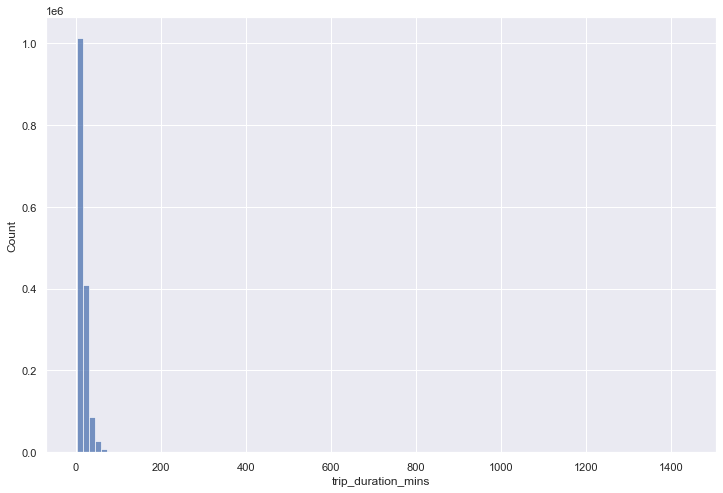

In [26]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.histplot(x='trip_duration_mins', data=result, bins=100)

<AxesSubplot:xlabel='log_trip_duration_mins', ylabel='Count'>

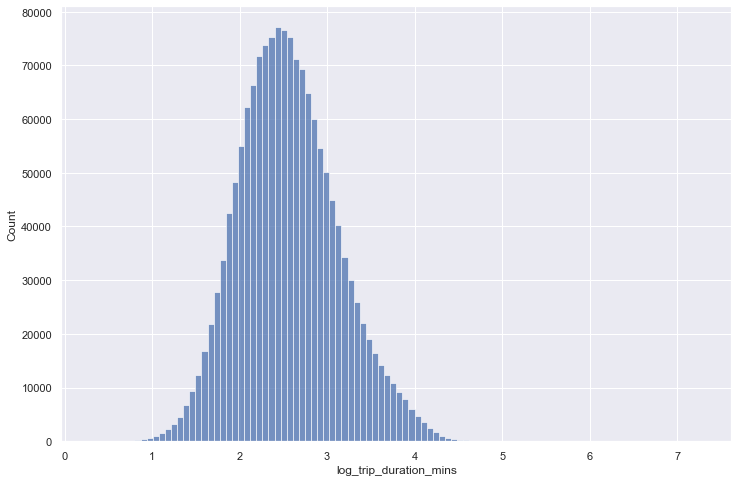

In [27]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.histplot(x='log_trip_duration_mins', data=result, bins=100)

## Trip Average Speed

Text(0, 0.5, 'Number of trips')

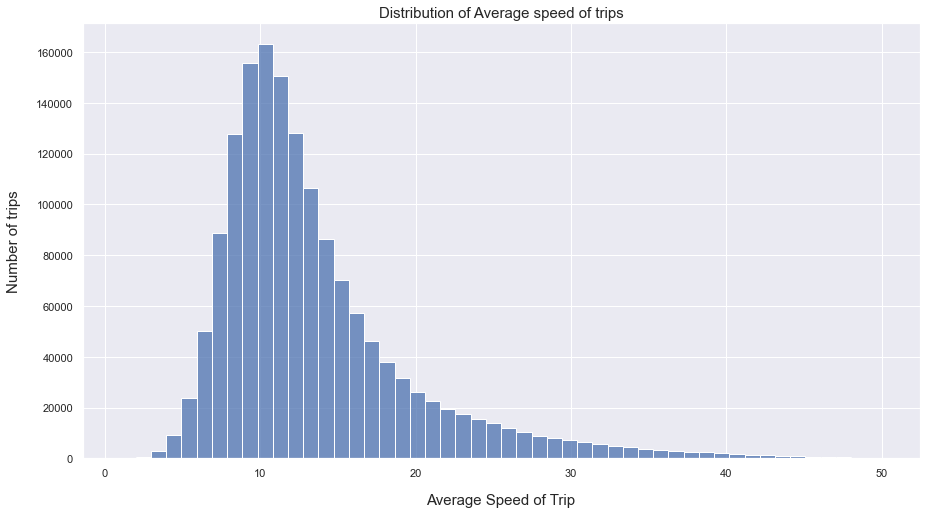

In [28]:
sns.set(rc = {'figure.figsize':(12,8)})
f, ax=plt.subplots(figsize=(15,8))
plt.title('Distribution of Average speed of trips', fontdict={'fontsize':15})
sns.histplot(x='speed', data=result, bins=50)
ax.set_xlabel('Average Speed of Trip', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Number of trips', labelpad=15, fontdict={'fontsize':15})

Text(0, 0.5, 'Number of trips')

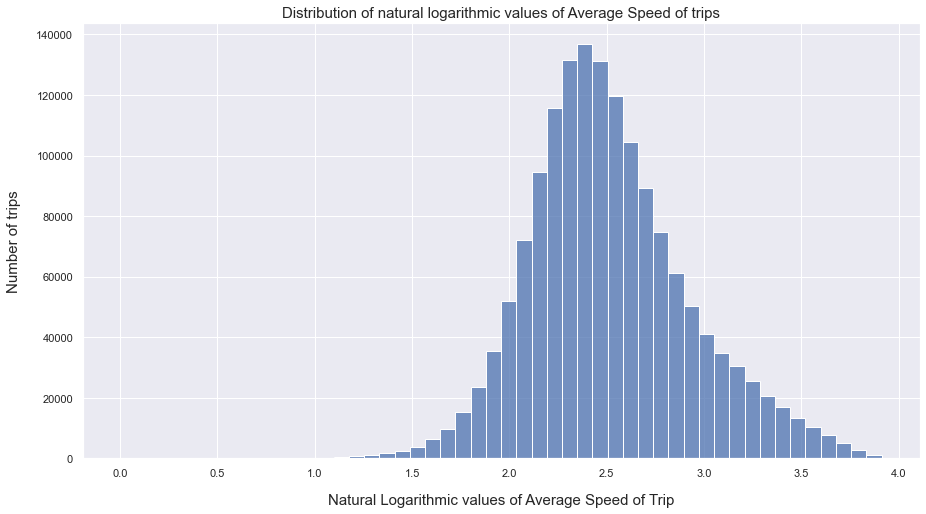

In [29]:
sns.set(rc = {'figure.figsize':(12,8)})
f, ax=plt.subplots(figsize=(15,8))
plt.title('Distribution of natural logarithmic values of Average Speed of trips', fontdict={'fontsize':15})
sns.histplot(x='log_speed', data=result, bins=50, palette='red')
ax.set_xlabel('Natural Logarithmic values of Average Speed of Trip', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Number of trips', labelpad=15, fontdict={'fontsize':15})

# Feature Selection for Model

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
corr = result[['passenger_count','pickup_day_number','tip_percentage',	'pickup_hour_quater', 'log_speed',	'log_trip_distance', 'trip_duration_hours','trip_duration_mins','log_trip_duration_hours', 'log_trip_duration_mins']].corr()
corr.style.background_gradient(cmap='coolwarm')

,passenger_count,pickup_day_number,tip_percentage,pickup_hour_quater,log_speed,log_trip_distance,trip_duration_hours,trip_duration_mins,log_trip_duration_hours,log_trip_duration_mins
passenger_count,1.000000,0.032096,0.008565,0.023935,0.008331,0.017514,0.017521,0.017521,0.016777,0.016777
pickup_day_number,0.032096,1.000000,-0.001433,0.113184,0.046381,0.027025,0.003917,0.003917,0.001464,0.001464
tip_percentage,0.008565,-0.001433,1.000000,-0.016961,-0.015979,-0.049623,-0.039448,-0.039448,-0.053087,-0.053087
pickup_hour_quater,0.023935,0.113184,-0.016961,1.000000,0.104333,0.037577,-0.027699,-0.027699,-0.026986,-0.026986
log_speed,0.008331,0.046381,-0.015979,0.104333,1.000000,0.648317,0.168351,0.168351,0.117203,0.117203
log_trip_distance,0.017514,0.027025,-0.049623,0.037577,0.648317,1.000000,0.737141,0.737141,0.832108,0.832108
trip_duration_hours,0.017521,0.003917,-0.039448,-0.027699,0.168351,0.737141,1.000000,1.000000,0.838870,0.838870
trip_duration_mins,0.017521,0.003917,-0.039448,-0.027699,0.168351,0.737141,1.000000,1.000000,0.838870,0.838870
log_trip_duration_hours,0.016777,0.001464,-0.053087,-0.026986,0.117203,0.832108,0.838870,0.838870,1.000000,1.000000
log_trip_duration_mins,0.016777,0.001464,-0.053087,-0.026986,0.117203,0.832108,0.838870,0.838870,1.000000,1.000000


In [32]:
X=result[['log_speed','pickup_hour_quater','pickup_day_number','passenger_count','log_trip_duration_mins','trip_distance']]
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                 variable        VIF
0               log_speed  21.820102
1      pickup_hour_quater   9.305679
2       pickup_day_number   3.736234
3         passenger_count   2.983107
4  log_trip_duration_mins  19.457454
5           trip_distance   2.815256


In [33]:
#Since log_trip_duration_mins and log_speeed are highly corelated and add to multicolinearity, we can drop one of them.
#Dropping log_trip_duration_mins and log_speeed

X=result[['trip_distance', 'pickup_hour_quater','pickup_day_number','passenger_count']]
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

             variable       VIF
0       trip_distance  1.725174
1  pickup_hour_quater  4.369408
2   pickup_day_number  3.284215
3     passenger_count  2.627734


# Decision Tree Classifier

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
X=result[['passenger_count', 'pickup_day_number', 'pickup_hour_quater', 'log_trip_distance']]
y=result[['tip_percentage_bin']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60    256423
           2       0.71      0.71      0.71    361429

    accuracy                           0.67    617852
   macro avg       0.66      0.66      0.66    617852
weighted avg       0.67      0.67      0.67    617852



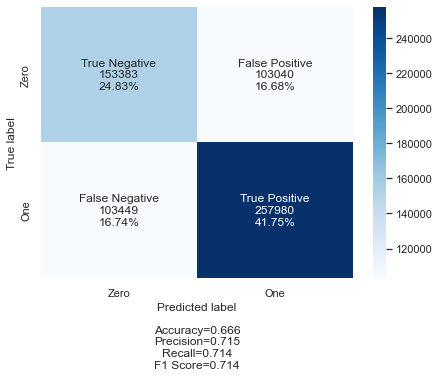

In [36]:
def make_confusion_matrix_plot(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))
        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

conf=(confusion_matrix(y_test,y_pred))
sns.set(rc = {'figure.figsize':(7,5)})
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Zero', 'One']
make_confusion_matrix_plot(conf, group_names=labels, categories=categories, cmap='Blues')

# Random Forest Regressor

In [43]:
chosen_idx = np.random.choice(1500000, replace=False, size=10000)
result_sample = result.iloc[chosen_idx]

In [44]:
X=result_sample[['passenger_count', 'trip_distance', 'pickup_day_number', 'pickup_hour_quater']]
y=result_sample[['tip_percentage']]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

C:\Users\romil\AppData\Local\Temp/ipykernel_6476/1976750987.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [47]:
importances = regressor.feature_importances_
indices = np.argsort(importances)
importance_matrix = pd.DataFrame()
importance_matrix['Variable'] = X.columns
importance_matrix['Importance of variable'] = importances[indices]*100
print(importance_matrix)

             Variable  Importance of variable
0     passenger_count                8.419201
1       trip_distance               10.704043
2   pickup_day_number               20.911076
3  pickup_hour_quater               59.965680


In [42]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 22.79975294401321
Root Mean Squared Error: 4.774908684363839
